In [9]:
#Part 1: Program to calculate and plot the best fit slope
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

xs=np.array([1,2,3,4,5,6], dtype=np.float64)
ys=np.array([5,4,6,5,6,7], dtype=np.float64)


#plt.scatter(xs,ys)
#plt.show()

In [10]:
def best_fit_slope_and_intercept(xs,ys):
  m= ( ((mean(xs) * mean(ys)) - mean(xs*ys))   /
      ( (mean(xs)**2) - mean(xs**2)   ) ) #from formula

  b= mean(ys) - m*mean(xs)  #from formula
  return m,b

m,b=best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.42857142857142866 4.0


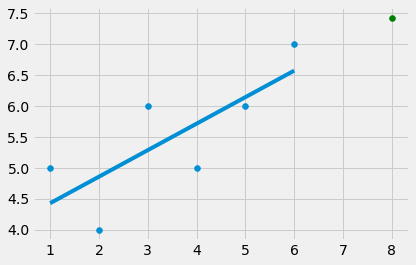

In [11]:
#Part 2: y-intercept and best fit line
#Changes made in the above function itself

regression_line = [(m*x+b) for x in xs]


pred_x=8
pred_y=(m*pred_x) + b

from matplotlib import style
style.use('fivethirtyeight')
plt.scatter(xs,ys)
plt.scatter(pred_x,pred_y, color='g')
plt.plot(xs,regression_line)
plt.show()

In [12]:
#Part 2: Applying R squared theorem

def squared_error(y_orig, y_line):

  return sum((y_line - y_orig)**2)

def coefficient_of_determination(y_orig, y_line):
  y_mean_line = [mean(y_orig) for y in y_orig]
  squared_error_regr= squared_error(y_orig, y_line)
  squared_error_y_mean= squared_error(y_orig, y_mean_line)
  return 1 - (squared_error_regr/squared_error_y_mean)

r_sq= coefficient_of_determination(ys, regression_line)
print(r_sq)

#Higher the r_sq value, better the line

0.5844155844155845


2.0620075046904303 0.615853658536615
0.9449881620647425


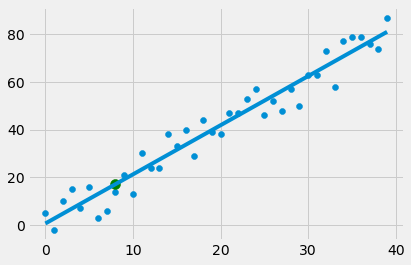

In [15]:
#Part 3: Testing assumptions
import random

def create_dataset(hm, variance, step=2, correlation=False):
  val = 1
  ys=[]

  for i in range(hm):
    y=val + random.randrange(-variance , variance)
    ys.append(y)

    if correlation and correlation == 'pos':
      val += step
    elif correlation and correlation == 'neg':
      val -= step
  xs=[i for i in range(len(ys))]

  return np.array(xs, dtype= np.float64),np.array(ys, dtype= np.float64)

xs,ys= create_dataset(40, 10, 2, correlation='pos') #lesser the variance, more the coefficient
m,b=best_fit_slope_and_intercept(xs,ys)
print(m,b)
regression_line = [(m*x+b) for x in xs]

r_sq= coefficient_of_determination(ys, regression_line)
print(r_sq)

pred_x=8
pred_y=(m*pred_x) + b

plt.scatter(xs,ys)
plt.scatter(pred_x,pred_y,s=100 ,color='g')
plt.plot(xs,regression_line)
plt.show()